In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from statistics import mean

# Study data files
census_metadata_path = "../ETL/ETL-Results/census_data.csv"
health_metadata_path = "../ETL/ETL-Results/four_mort_measures.csv"

# Read the mouse data and the study results
health_metadata = pd.read_csv(health_metadata_path)
census_metadata = pd.read_csv(census_metadata_path)

# Combine the data into a single dataset
race_data_df = pd.merge(health_metadata, census_metadata, how = "inner", right_on = ["State Abbr", "County Name"], 
                        left_on = ["State", "County Name"])

# Display the data table for preview
race_data_df.columns


Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State_x',
       'ZIP Code', 'County Name', 'Measure ID', 'Measure Name', 'Denominator',
       'Score', 'Lower Estimate', 'Higher Estimate', 'Start Date', 'End Date',
       'State_y', 'State Abbr', 'Household Median Income',
       'Family's Median Income', 'Total Population', 'Percent Poverty',
       'Percent Veteran', 'Percent Married', 'Percent Bachelor',
       'Percent One Race White', 'Percent One Race Black+',
       'Percent One Race American Indian+', 'Percent One Race Asian',
       'Percent One Race Hawaiian+', 'Percent One Race Some Other',
       'Percent Two Race Or More', 'State Code', 'County Code'],
      dtype='object')

In [2]:
race_data_df = race_data_df.rename(columns={"State_y":"State", "Score": "Mortality Percentage"})


In [3]:
race_merged = race_data_df[['Facility Name', 'County Name','City', 'State Abbr', 'Measure Name', 'Mortality Percentage','Percent One Race White', 'Percent One Race Black+',
       'Percent One Race American Indian+', 'Percent One Race Asian',
       'Percent One Race Hawaiian+', 'Percent One Race Some Other',
       'Percent Two Race Or More']]
race_merged

,Facility Name,County Name,City,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+,Percent One Race American Indian+,Percent One Race Asian,Percent One Race Hawaiian+,Percent One Race Some Other,Percent Two Race Or More
0,MISSION COMMUNITY HOSPITAL,LOS ANGELES,PANORAMA CITY,CA,Death rate for COPD patients,5.1,51.3,8.1,0.7,14.6,0.3,21.0,4.0
1,CEDARS-SINAI MEDICAL CENTER,LOS ANGELES,LOS ANGELES,CA,Death rate for COPD patients,5.2,51.3,8.1,0.7,14.6,0.3,21.0,4.0
2,CENTINELA HOSPITAL MEDICAL CENTER,LOS ANGELES,INGLEWOOD,CA,Death rate for heart failure patients,5.3,51.3,8.1,0.7,14.6,0.3,21.0,4.0
3,"L A DOWNTOWN MEDICAL CENTER, LLC",LOS ANGELES,LOS ANGELES,CA,Death rate for COPD patients,5.3,51.3,8.1,0.7,14.6,0.3,21.0,4.0
4,"WEST COVINA MEDICAL CENTER, INC",LOS ANGELES,WEST COVINA,CA,Death rate for COPD patients,5.5,51.3,8.1,0.7,14.6,0.3,21.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13211,NEWMAN MEMORIAL HOSPITAL,ELLIS,SHATTUCK,OK,Death rate for pneumonia patients,18.9,92.0,0.2,2.3,0.7,0.0,1.1,3.8
13212,LIFEBRITE COMMUNITY HOSPITAL OF EARLY,EARLY,BLAKELY,GA,Death rate for pneumonia patients,19.2,45.3,52.5,0.3,0.6,0.0,0.0,1.4
13213,CRETE AREA MEDICAL CENTER,SALINE,CRETE,NE,Death rate for pneumonia patients,19.4,88.8,2.5,0.2,2.0,0.0,3.7,2.8
13214,MERCY HOSPITAL OZARK,FRANKLIN,OZARK,AR,Death rate for pneumonia patients,19.6,94.0,1.0,1.6,0.8,0.2,0.4,1.9


In [4]:
race_state = race_merged.loc[race_merged['State Abbr'] == 'CA'] 
race_state

,Facility Name,County Name,City,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+,Percent One Race American Indian+,Percent One Race Asian,Percent One Race Hawaiian+,Percent One Race Some Other,Percent Two Race Or More
0,MISSION COMMUNITY HOSPITAL,LOS ANGELES,PANORAMA CITY,CA,Death rate for COPD patients,5.1,51.3,8.1,0.7,14.6,0.3,21.0,4.0
1,CEDARS-SINAI MEDICAL CENTER,LOS ANGELES,LOS ANGELES,CA,Death rate for COPD patients,5.2,51.3,8.1,0.7,14.6,0.3,21.0,4.0
2,CENTINELA HOSPITAL MEDICAL CENTER,LOS ANGELES,INGLEWOOD,CA,Death rate for heart failure patients,5.3,51.3,8.1,0.7,14.6,0.3,21.0,4.0
3,"L A DOWNTOWN MEDICAL CENTER, LLC",LOS ANGELES,LOS ANGELES,CA,Death rate for COPD patients,5.3,51.3,8.1,0.7,14.6,0.3,21.0,4.0
4,"WEST COVINA MEDICAL CENTER, INC",LOS ANGELES,WEST COVINA,CA,Death rate for COPD patients,5.5,51.3,8.1,0.7,14.6,0.3,21.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777,ADVENTIST HEALTH HANFORD,KINGS,HANFORD,CA,Death rate for heart attack patients,13.3,67.7,6.4,1.6,3.9,0.2,16.1,4.1
12778,ADVENTIST HEALTH HANFORD,KINGS,HANFORD,CA,Death rate for pneumonia patients,16.8,67.7,6.4,1.6,3.9,0.2,16.1,4.1
12903,TRINITY HOSPITAL,TRINITY,WEAVERVILLE,CA,Death rate for heart failure patients,12.2,86.0,1.0,5.6,1.8,0.2,3.4,2.0
12904,TRINITY HOSPITAL,TRINITY,WEAVERVILLE,CA,Death rate for pneumonia patients,14.2,86.0,1.0,5.6,1.8,0.2,3.4,2.0


In [5]:
race_state_copd = race_state.loc[race_state['Measure Name']=='Death rate for COPD patients']
race_state_pneumonia = race_state.loc[race_state['Measure Name']=='Death rate for pneumonia patients']
race_state_heart_failure = race_state.loc[race_state['Measure Name']=='Death rate for heart failure patients']
race_state_heart_attack = race_state.loc[race_state['Measure Name']=='Death rate for heart attack patients']

The r-squared value is: 0.05981544345840727
The p-value is: 2.8939971590921634e-05


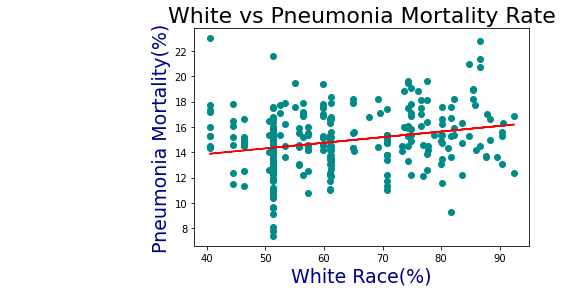

In [6]:
plt.figure(figsize = (6,4))
plt.title('White vs Pneumonia Mortality Rate', size = 22)
plt.xlabel('White Race(%)',size= 19,  color= "darkblue")
plt.ylabel('Pneumonia Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_pneumonia["Percent One Race White"]
y_values = race_state_pneumonia["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Negative p-value == Statistically significant

The r-squared value is: 0.11467770255649093


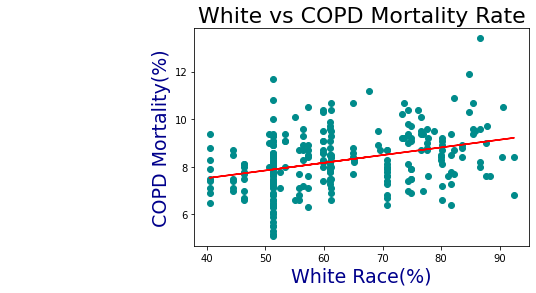

In [7]:
plt.figure(figsize = (6,4))
plt.title('White vs COPD Mortality Rate', size = 22)
plt.xlabel('White Race(%)',size= 19,  color= "darkblue")
plt.ylabel('COPD Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_copd["Percent One Race White"]
y_values = race_state_copd["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()


In [8]:
# total pop = county
# 2 variables => ex: Race(% of population) vs mortality
    
# *t-test= group of mortality for white/group of mortality for blacks
# *Perform histogram using all counties across the US. 
# Determine threshold of each race %(each county can ONLY be in group-- either black or white). 
# At which percent are we going to put a county in which race group?
#  -- if the threshold chosen for black == 35%, then white threshold must be 65.1+%. They must equal =>100%


The r-squared value is: 0.18175482765066436
The p-value is: 2.639288003861842e-13


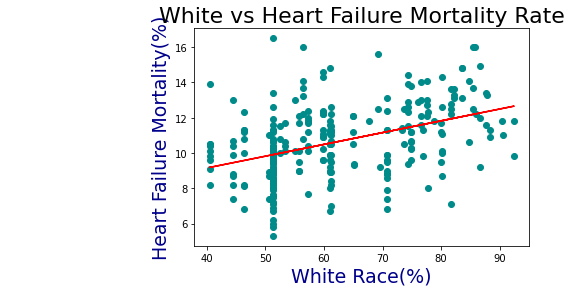

In [9]:
plt.figure(figsize = (6,4))
plt.title('White vs Heart Failure Mortality Rate', size = 22)
plt.xlabel('White Race(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Failure Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_failure["Percent One Race White"]
y_values = race_state_heart_failure["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Negative p-value == Statistically significant

The r-squared value is: 0.05321022360897221
The p-value is: 0.0010154925710827711


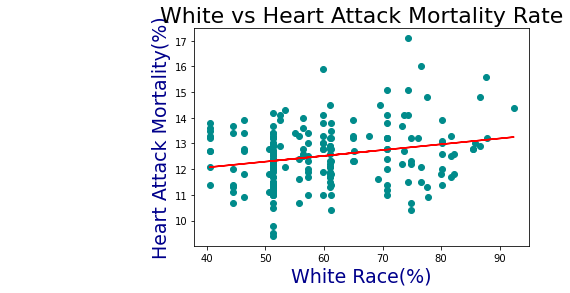

In [10]:
plt.figure(figsize = (6,4))
plt.title('White vs Heart Attack Mortality Rate', size = 22)
plt.xlabel('White Race(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Attack Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_attack["Percent One Race White"]
y_values = race_state_heart_attack["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Statistically significant

The r-squared value is: 0.03168171946965306
The p-value is: 0.0025183931752837648


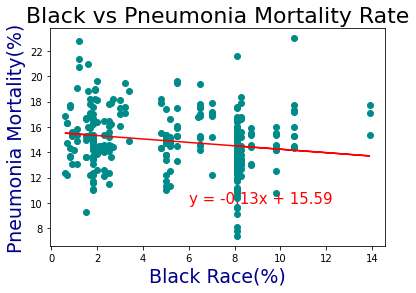

In [11]:
plt.figure(figsize = (6,4))
plt.title('Black vs Pneumonia Mortality Rate', size = 22)
plt.xlabel('Black Race(%)',size= 19,  color= "darkblue")
plt.ylabel('Pneumonia Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_pneumonia["Percent One Race Black+"]
y_values = race_state_pneumonia["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Statistically significant

The r-squared value is: 0.0829665521321199
The p-value is: 2.436145330298268e-06


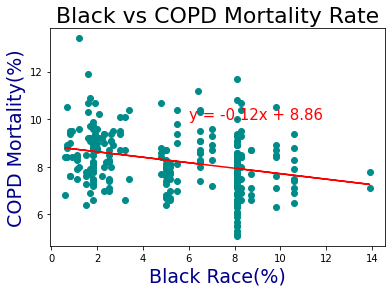

In [12]:
plt.figure(figsize = (6,4))
plt.title('Black vs COPD Mortality Rate', size = 22)
plt.xlabel('Black Race(%)',size= 19,  color= "darkblue")
plt.ylabel('COPD Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_copd["Percent One Race Black+"]
y_values = race_state_copd["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Negative p-value == Statistically significant

In [13]:
race_state_copd.dtypes

Facility Name                         object
County Name                           object
City                                  object
State Abbr                            object
Measure Name                          object
Mortality Percentage                 float64
Percent One Race White               float64
Percent One Race Black+              float64
Percent One Race American Indian+    float64
Percent One Race Asian               float64
Percent One Race Hawaiian+           float64
Percent One Race Some Other          float64
Percent Two Race Or More             float64
dtype: object

The r-squared value is: 0.07711085849796977
The p-value is: 3.755213212553886e-06


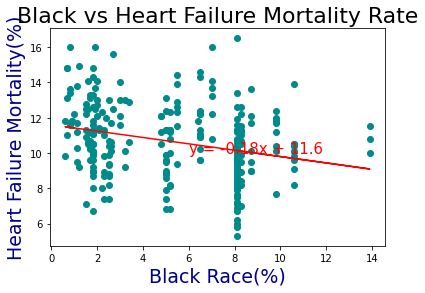

In [14]:
plt.figure(figsize = (6,4))
plt.title('Black vs Heart Failure Mortality Rate', size = 22)
plt.xlabel('Black Race(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Failure Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_failure["Percent One Race Black+"]
y_values = race_state_heart_failure["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Negative p-value == Statistically significant

The r-squared value is: 0.0069610070706213785
The p-value is: 0.24016713555446836


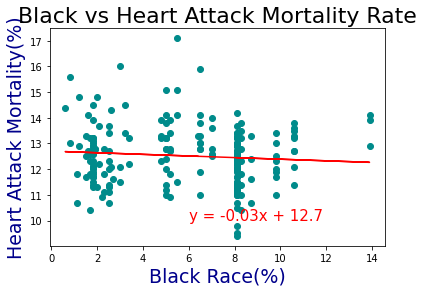

In [15]:
plt.figure(figsize = (6,4))
plt.title('Black vs Heart Attack Mortality Rate', size = 22)
plt.xlabel('Black Race(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Attack Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_attack["Percent One Race Black+"]
y_values = race_state_heart_attack["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()

The r-squared value is: 0.008693103801948853
The p-value is: 0.11564910403107564


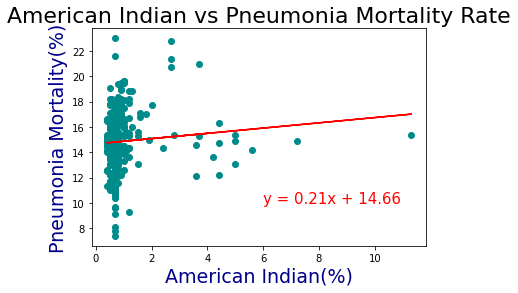

In [16]:
plt.figure(figsize = (6,4))
plt.title('American Indian vs Pneumonia Mortality Rate', size = 22)
plt.xlabel('American Indian(%)',size= 19,  color= "darkblue")
plt.ylabel('Pneumonia Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_pneumonia["Percent One Race American Indian+"]
y_values = race_state_pneumonia["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()

The r-squared value is: 0.03067452573784885
The p-value is: 0.00470034005768337


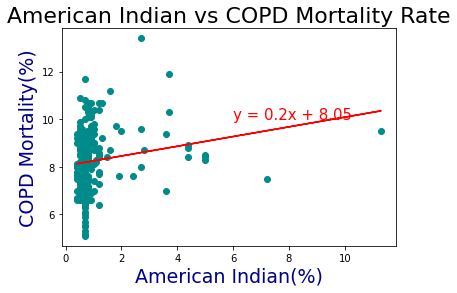

In [17]:
plt.figure(figsize = (6,4))
plt.title('American Indian vs COPD Mortality Rate', size = 22)
plt.xlabel('American Indian(%)',size= 19,  color= "darkblue")
plt.ylabel('COPD Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_copd["Percent One Race American Indian+"]
y_values = race_state_copd["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Statistically significant

The r-squared value is: 0.03688401483307899
The p-value is: 0.0015522587940742178


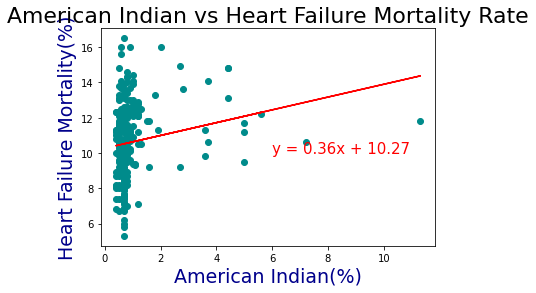

In [18]:
plt.figure(figsize = (6,4))
plt.title('American Indian vs Heart Failure Mortality Rate', size = 22)
plt.xlabel('American Indian(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Failure Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_failure["Percent One Race American Indian+"]
y_values = race_state_heart_failure["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Statistically significant

The r-squared value is: 0.007549014656207336
The p-value is: 0.22119623800060265


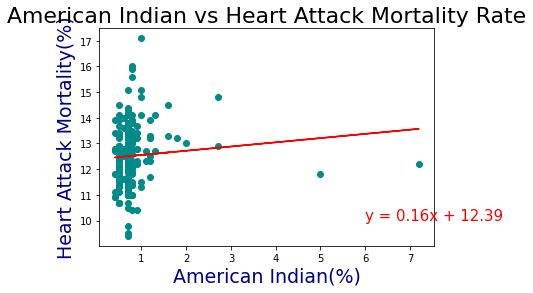

In [19]:
plt.figure(figsize = (6,4))
plt.title('American Indian vs Heart Attack Mortality Rate', size = 22)
plt.xlabel('American Indian(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Attack Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_attack["Percent One Race American Indian+"]
y_values = race_state_heart_attack["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()

The r-squared value is: 0.030466717901199633
The p-value is: 0.003059437899623395


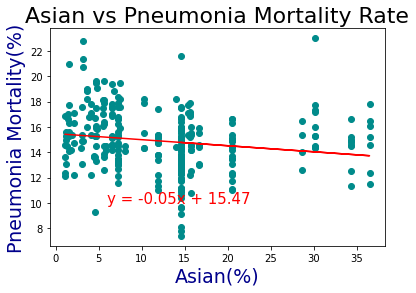

In [20]:
plt.figure(figsize = (6,4))
plt.title('Asian vs Pneumonia Mortality Rate', size = 22)
plt.xlabel('Asian(%)',size= 19,  color= "darkblue")
plt.ylabel('Pneumonia Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_pneumonia["Percent One Race Asian"]
y_values = race_state_pneumonia["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Statistically significant

The r-squared value is: 0.08551507488241249
The p-value is: 1.6800799593931614e-06


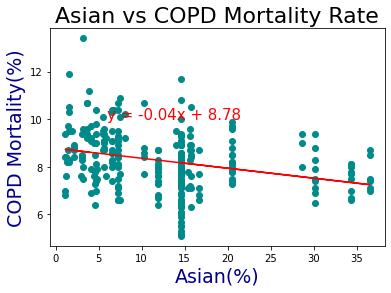

In [21]:
plt.figure(figsize = (6,4))
plt.title('Asian vs COPD Mortality Rate', size = 22)
plt.xlabel('Asian(%)',size= 19,  color= "darkblue")
plt.ylabel('COPD Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_copd["Percent One Race Asian"]
y_values = race_state_copd["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Negative p-value == Statistically significant

The r-squared value is: 0.09873328171491563
The p-value is: 1.4135176904409573e-07


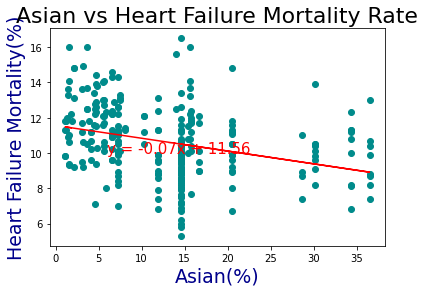

In [22]:
plt.figure(figsize = (6,4))
plt.title('Asian vs Heart Failure Mortality Rate', size = 22)
plt.xlabel('Asian(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Failure Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_failure["Percent One Race Asian"]
y_values = race_state_heart_failure["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Negative p-value == Statistically signficant

The r-squared value is: 0.030666075265577405
The p-value is: 0.01313067349795033


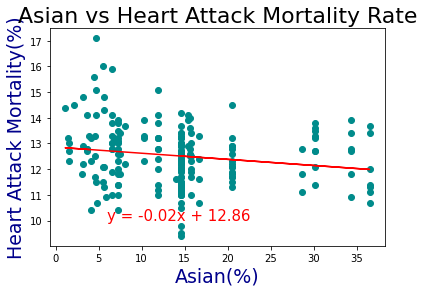

In [23]:
plt.figure(figsize = (6,4))
plt.title('Asian vs Heart Attack Mortality Rate', size = 22)
plt.xlabel('Asian(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Attack Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_attack["Percent One Race Asian"]
y_values = race_state_heart_attack["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()
# Statistically significant

The r-squared value is: 0.00020138364046361752
The p-value is: 0.8111427320673037


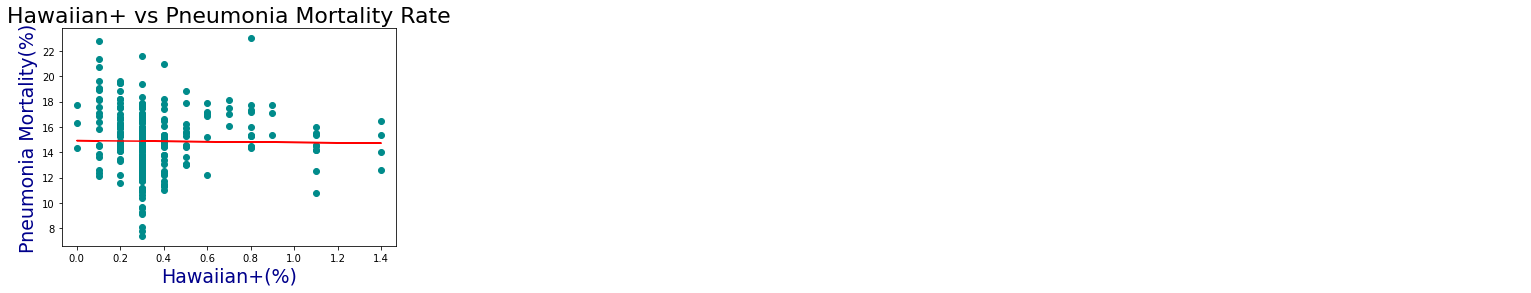

In [24]:
plt.figure(figsize = (6,4))
plt.title('Hawaiian+ vs Pneumonia Mortality Rate', size = 22)
plt.xlabel('Hawaiian+(%)',size= 19,  color= "darkblue")
plt.ylabel('Pneumonia Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_pneumonia["Percent One Race Hawaiian+"]
y_values = race_state_pneumonia["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()

The r-squared value is: 0.004486353363462685
The p-value is: 0.2828506948567937


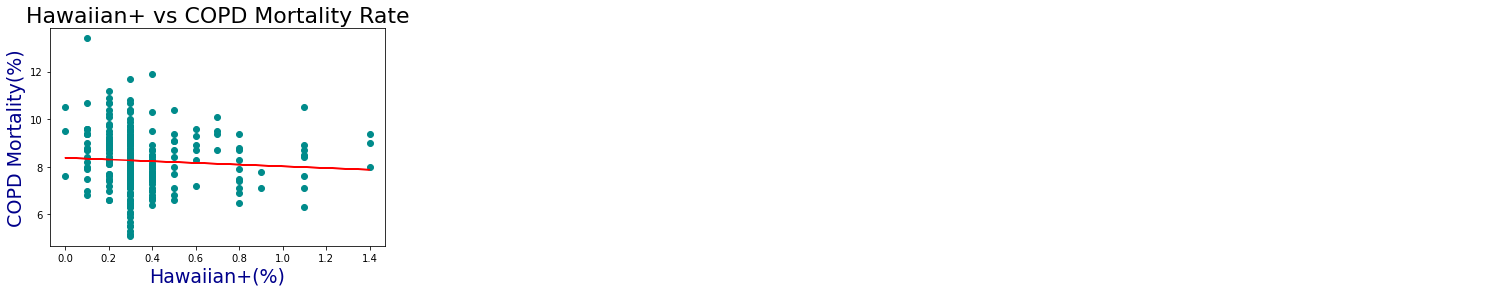

In [25]:
plt.figure(figsize = (6,4))
plt.title('Hawaiian+ vs COPD Mortality Rate', size = 22)
plt.xlabel('Hawaiian+(%)',size= 19,  color= "darkblue")
plt.ylabel('COPD Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_copd["Percent One Race Hawaiian+"]
y_values = race_state_copd["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()

The r-squared value is: 0.004869077516633631
The p-value is: 0.25407046601023214


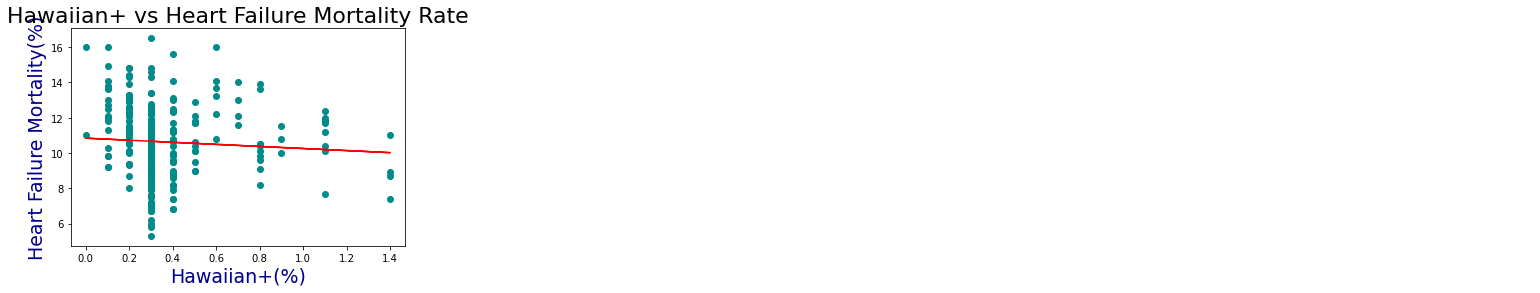

In [26]:
plt.figure(figsize = (6,4))
plt.title('Hawaiian+ vs Heart Failure Mortality Rate', size = 22)
plt.xlabel('Hawaiian+(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Failure Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_failure["Percent One Race Hawaiian+"]
y_values = race_state_heart_failure["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()

The r-squared value is: 0.0005750498779137277
The p-value is: 0.7360761962507144


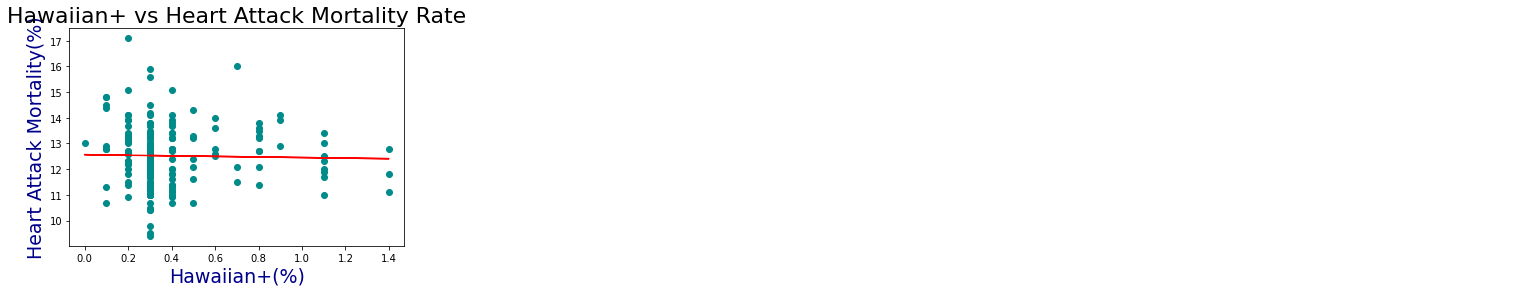

In [27]:
plt.figure(figsize = (6,4))
plt.title('Hawaiian+ vs Heart Attack Mortality Rate', size = 22)
plt.xlabel('Hawaiian+(%)',size= 19,  color= "darkblue")
plt.ylabel('Heart Attack Mortality(%)', size= 19,  color= "darkblue")

x_values = race_state_heart_attack["Percent One Race Hawaiian+"]
y_values = race_state_heart_attack["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")
plt.show()

In [28]:
race_merged.head()

,Facility Name,County Name,City,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+,Percent One Race American Indian+,Percent One Race Asian,Percent One Race Hawaiian+,Percent One Race Some Other,Percent Two Race Or More
0,MISSION COMMUNITY HOSPITAL,LOS ANGELES,PANORAMA CITY,CA,Death rate for COPD patients,5.1,51.3,8.1,0.7,14.6,0.3,21.0,4.0
1,CEDARS-SINAI MEDICAL CENTER,LOS ANGELES,LOS ANGELES,CA,Death rate for COPD patients,5.2,51.3,8.1,0.7,14.6,0.3,21.0,4.0
2,CENTINELA HOSPITAL MEDICAL CENTER,LOS ANGELES,INGLEWOOD,CA,Death rate for heart failure patients,5.3,51.3,8.1,0.7,14.6,0.3,21.0,4.0
3,"L A DOWNTOWN MEDICAL CENTER, LLC",LOS ANGELES,LOS ANGELES,CA,Death rate for COPD patients,5.3,51.3,8.1,0.7,14.6,0.3,21.0,4.0
4,"WEST COVINA MEDICAL CENTER, INC",LOS ANGELES,WEST COVINA,CA,Death rate for COPD patients,5.5,51.3,8.1,0.7,14.6,0.3,21.0,4.0


In [29]:
# hist_df = race_merged[race_merged['State Abbr']== 'AL']
# hist_df

In [30]:
hist_agg = race_merged.groupby(['County Name', 'State Abbr']).agg({'Percent One Race Black+':'mean'})
hist_agg.head()

,,Percent One Race Black+
County Name,State Abbr,
ABBEVILLE,SC,27.6
ACADIA,LA,17.4
ACCOMACK,VA,28.6
ADA,ID,1.4
ADAIR,KY,3.1


In [31]:
hist_agg=hist_agg.sort_values('Percent One Race Black+')
hist_agg

,,Percent One Race Black+
County Name,State Abbr,
FAULK,SD,0.0
FALLON,MT,0.0
EMMONS,ND,0.0
SCOTLAND,MO,0.0
WELLS,ND,0.0
...,...,...
BULLOCK,AL,74.8
PETERSBURG CITY,VA,76.7
COAHOMA,MS,77.6


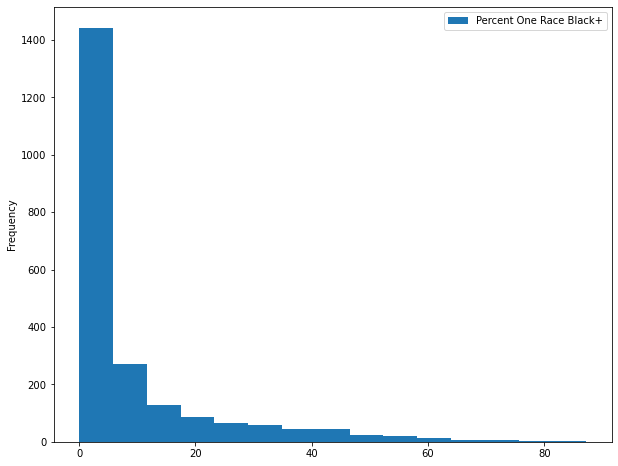

In [32]:
hist_agg.plot.hist(bins=15, figsize = (10,8))
# plt.xticks(hist_agg.index.values)


# Question for Eric
What do we gain by finding a threshold to say that this is a predominately white or black racial county?
* For example, the histo above(%black) and the median value
* Where might we go from here?
* Is the median value valuable in this scenario?

Possible T-Test
* Filter on w/e threshold we decide against the mortality rate for each disease.
* What are the 2 groups then? Is it white vs black, or white vs all minority populations?

In [33]:
# t-test would give:
# high percent white counties vs high percent black counties
# do 4 t-tests: w vs b compared to all 4 mortalities
# filter on percent black

In [34]:
# Calculate where 50%above/50%below
hist_agg['Percent One Race Black+'].mean()


8.943256653134867

In [35]:
hist_agg_white = race_merged.groupby(['County Name', 'State Abbr']).agg({'Percent One Race White':'mean'})
hist_agg_white.head()

,,Percent One Race White
County Name,State Abbr,
ABBEVILLE,SC,69.9
ACADIA,LA,79.3
ACCOMACK,VA,68.2
ADA,ID,90.5
ADAIR,KY,94.9


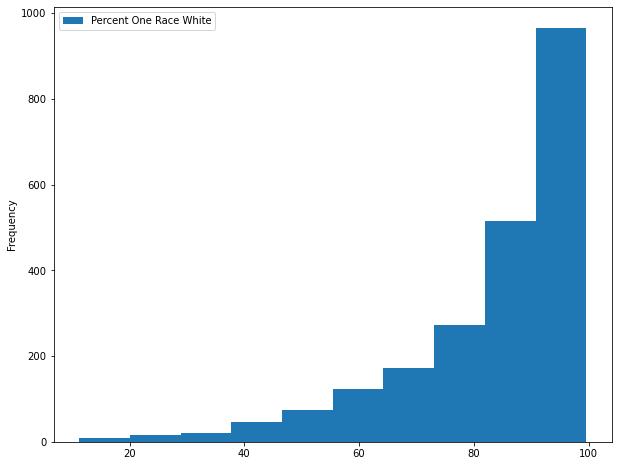

In [36]:
hist_agg_white.plot.hist(bins=10, figsize = (10,8))
# plt.xticks(hist_agg.index.values)

In [37]:
hist_agg_white['Percent One Race White'].mean()

83.03157419936852

In [38]:
race_merged = race_merged.groupby(['County Name', 'State Abbr', 'Measure Name']).agg({
    'Mortality Percentage' : 'mean',
    'Percent One Race White' : 'mean',
    'Percent One Race Black+' : 'mean'
}).reset_index()

In [39]:
race_merged[race_merged['Percent One Race Black+'] > hist_agg['Percent One Race Black+'].mean()] 

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
0,ABBEVILLE,SC,Death rate for pneumonia patients,16.6,69.9,27.6
1,ACADIA,LA,Death rate for COPD patients,9.6,79.3,17.4
2,ACADIA,LA,Death rate for heart failure patients,11.8,79.3,17.4
3,ACADIA,LA,Death rate for pneumonia patients,17.7,79.3,17.4
4,ACCOMACK,VA,Death rate for COPD patients,9.6,68.2,28.6
...,...,...,...,...,...,...
6942,YAZOO,MS,Death rate for pneumonia patients,12.9,36.9,59.6
6966,YORK,SC,Death rate for COPD patients,10.6,74.2,19.2
6967,YORK,SC,Death rate for heart attack patients,14.2,74.2,19.2
6968,YORK,SC,Death rate for heart failure patients,15.2,74.2,19.2


In [40]:
race_merged[race_merged['Percent One Race White'] > hist_agg_white['Percent One Race White'].mean()] 

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
8,ADA,ID,Death rate for COPD patients,8.366667,90.5,1.4
9,ADA,ID,Death rate for heart attack patients,12.400000,90.5,1.4
10,ADA,ID,Death rate for heart failure patients,11.566667,90.5,1.4
11,ADA,ID,Death rate for pneumonia patients,12.900000,90.5,1.4
12,ADAIR,KY,Death rate for pneumonia patients,14.300000,94.9,3.1
...,...,...,...,...,...,...
6970,YOUNG,TX,Death rate for COPD patients,7.900000,95.7,2.1
6971,YOUNG,TX,Death rate for heart failure patients,10.700000,95.7,2.1
6972,YOUNG,TX,Death rate for pneumonia patients,15.100000,95.7,2.1
6981,YUMA,CO,Death rate for COPD patients,8.500000,95.8,1.1


In [41]:
race_merged[(race_merged['Percent One Race White'] > hist_agg_white['Percent One Race White'].mean()) & (race_merged['Percent One Race Black+'] > hist_agg['Percent One Race Black+'].mean())] 

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
86,ALCORN,MS,Death rate for COPD patients,7.80,84.4,12.1
87,ALCORN,MS,Death rate for heart attack patients,15.90,84.4,12.1
88,ALCORN,MS,Death rate for heart failure patients,12.70,84.4,12.1
89,ALCORN,MS,Death rate for pneumonia patients,18.80,84.4,12.1
280,BALDWIN,AL,Death rate for COPD patients,8.90,86.2,9.3
...,...,...,...,...,...,...
6289,UNION,KY,Death rate for heart failure patients,12.70,83.2,13.3
6353,VANDERBURGH,IN,Death rate for COPD patients,9.75,85.0,9.5
6354,VANDERBURGH,IN,Death rate for heart attack patients,13.55,85.0,9.5
6355,VANDERBURGH,IN,Death rate for heart failure patients,12.05,85.0,9.5


In [42]:
race_dropped = race_merged[~((race_merged['Percent One Race White'] > hist_agg_white['Percent One Race White'].mean()) & (race_merged['Percent One Race Black+'] > hist_agg['Percent One Race Black+'].mean()))]
race_dropped

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
0,ABBEVILLE,SC,Death rate for pneumonia patients,16.6,69.9,27.6
1,ACADIA,LA,Death rate for COPD patients,9.6,79.3,17.4
2,ACADIA,LA,Death rate for heart failure patients,11.8,79.3,17.4
3,ACADIA,LA,Death rate for pneumonia patients,17.7,79.3,17.4
4,ACCOMACK,VA,Death rate for COPD patients,9.6,68.2,28.6
...,...,...,...,...,...,...
6978,YUMA,AZ,Death rate for heart attack patients,11.2,76.3,2.2
6979,YUMA,AZ,Death rate for heart failure patients,12.3,76.3,2.2
6980,YUMA,AZ,Death rate for pneumonia patients,17.1,76.3,2.2
6981,YUMA,CO,Death rate for COPD patients,8.5,95.8,1.1


In [43]:
white_df = race_dropped[race_dropped['Percent One Race White'] > hist_agg_white['Percent One Race White'].mean()]
white_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
8,ADA,ID,Death rate for COPD patients,8.366667,90.5,1.4
9,ADA,ID,Death rate for heart attack patients,12.400000,90.5,1.4
10,ADA,ID,Death rate for heart failure patients,11.566667,90.5,1.4
11,ADA,ID,Death rate for pneumonia patients,12.900000,90.5,1.4
12,ADAIR,KY,Death rate for pneumonia patients,14.300000,94.9,3.1
...,...,...,...,...,...,...
6970,YOUNG,TX,Death rate for COPD patients,7.900000,95.7,2.1
6971,YOUNG,TX,Death rate for heart failure patients,10.700000,95.7,2.1
6972,YOUNG,TX,Death rate for pneumonia patients,15.100000,95.7,2.1
6981,YUMA,CO,Death rate for COPD patients,8.500000,95.8,1.1


In [44]:
black_df = race_dropped[race_dropped['Percent One Race Black+'] > hist_agg['Percent One Race Black+'].mean()] 
black_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
0,ABBEVILLE,SC,Death rate for pneumonia patients,16.6,69.9,27.6
1,ACADIA,LA,Death rate for COPD patients,9.6,79.3,17.4
2,ACADIA,LA,Death rate for heart failure patients,11.8,79.3,17.4
3,ACADIA,LA,Death rate for pneumonia patients,17.7,79.3,17.4
4,ACCOMACK,VA,Death rate for COPD patients,9.6,68.2,28.6
...,...,...,...,...,...,...
6942,YAZOO,MS,Death rate for pneumonia patients,12.9,36.9,59.6
6966,YORK,SC,Death rate for COPD patients,10.6,74.2,19.2
6967,YORK,SC,Death rate for heart attack patients,14.2,74.2,19.2
6968,YORK,SC,Death rate for heart failure patients,15.2,74.2,19.2


In [45]:
black_COPD_df = black_df[black_df['Measure Name'] == 'Death rate for COPD patients']
black_COPD_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
1,ACADIA,LA,Death rate for COPD patients,9.6,79.3,17.4
4,ACCOMACK,VA,Death rate for COPD patients,9.6,68.2,28.6
33,ADAMS,MS,Death rate for COPD patients,10.1,40.9,56.3
53,AIKEN,SC,Death rate for COPD patients,9.4,70.7,25.0
60,ALACHUA,FL,Death rate for COPD patients,7.1,68.9,20.1
...,...,...,...,...,...,...
6891,WORCESTER,MD,Death rate for COPD patients,7.5,83.0,12.9
6904,WYANDOTTE,KS,Death rate for COPD patients,6.9,58.8,22.3
6922,YALOBUSHA,MS,Death rate for COPD patients,7.1,59.0,39.7
6940,YAZOO,MS,Death rate for COPD patients,8.1,36.9,59.6


In [46]:
white_COPD_df = white_df[white_df['Measure Name'] == 'Death rate for COPD patients']
white_COPD_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
8,ADA,ID,Death rate for COPD patients,8.366667,90.5,1.4
13,ADAIR,MO,Death rate for COPD patients,8.800000,91.6,2.7
24,ADAMS,IA,Death rate for COPD patients,7.600000,98.6,0.1
26,ADAMS,IL,Death rate for COPD patients,8.300000,92.9,4.1
30,ADAMS,IN,Death rate for COPD patients,7.700000,96.4,1.1
...,...,...,...,...,...,...
6955,YORK,ME,Death rate for COPD patients,9.700000,95.5,0.9
6959,YORK,NE,Death rate for COPD patients,8.400000,94.7,1.6
6962,YORK,PA,Death rate for COPD patients,8.433333,88.4,5.9
6970,YOUNG,TX,Death rate for COPD patients,7.900000,95.7,2.1


In [47]:
st.ttest_ind(black_COPD_df['Mortality Percentage'], white_COPD_df['Mortality Percentage'], equal_var=False)

Ttest_indResult(statistic=0.02754110214524168, pvalue=0.978033880239575)

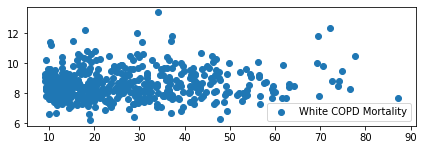

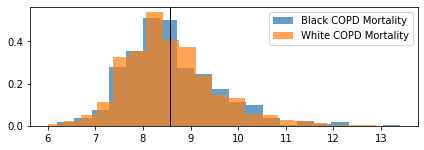

In [48]:
plt.subplot(2, 1, 1)
plt.scatter(black_COPD_df['Percent One Race Black+'], black_COPD_df['Mortality Percentage'], label="White COPD Mortality")
plt.legend()
plt.tight_layout()

plt.show()
plt.subplot(2, 1, 2)
plt.hist(black_COPD_df['Mortality Percentage'], 20, density=True, alpha=0.7, label="Black COPD Mortality")
plt.hist(white_COPD_df['Mortality Percentage'], 20, density=True, alpha=0.7, label="White COPD Mortality")
plt.axvline(mean(black_COPD_df['Mortality Percentage']), color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean(white_COPD_df['Mortality Percentage']), color='k', linestyle='solid', linewidth=1)
plt.legend()  
plt.tight_layout()
plt.show()

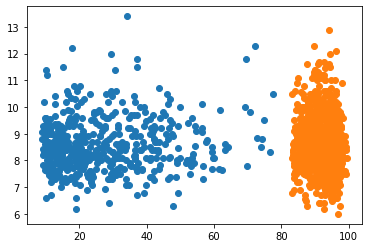

In [49]:
#white_COPD_df['race']=1
#black_COPD_df['race']=2
#white_COPD_df['Percent One Race']=white_COPD_df['Percent One Race White']
#black_COPD_df['Percent One Race']=black_COPD_df['Percent One Race Black+']
plt.scatter(black_COPD_df['Percent One Race Black+'], black_COPD_df['Mortality Percentage'], label="Black COPD Mortality")
plt.scatter(white_COPD_df['Percent One Race White'], white_COPD_df['Mortality Percentage'], label="White COPD Mortality")
#pd.concat([white_COPD_df, black_COPD_df], axis=0).plot(kind='scatter', x='Percent One Race', y='Mortality Percentage')
#.scatter(x='Percent')

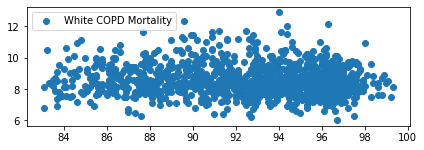

In [50]:
plt.subplot(2, 1, 1)
plt.scatter(white_COPD_df['Percent One Race White'], white_COPD_df['Mortality Percentage'], label="White COPD Mortality")
plt.legend()
plt.tight_layout()

C:\Users\jayhj\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


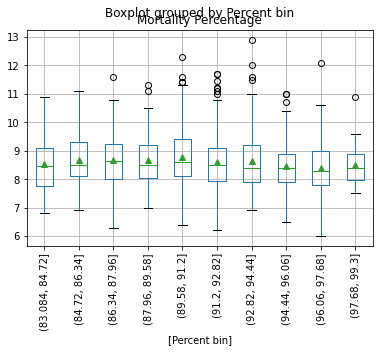

In [51]:
white_COPD_df['Percent bin']=pd.cut(white_COPD_df['Percent One Race White'], bins=10)
white_COPD_df[['Percent bin', 'Mortality Percentage']].boxplot(by='Percent bin', rot=90, showmeans=True)

In [52]:
white_pn_df = white_df[white_df['Measure Name'] == 'Death rate for pneumonia patients']
white_pn_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
11,ADA,ID,Death rate for pneumonia patients,12.900000,90.5,1.4
12,ADAIR,KY,Death rate for pneumonia patients,14.300000,94.9,3.1
16,ADAIR,MO,Death rate for pneumonia patients,12.400000,91.6,2.7
25,ADAMS,IA,Death rate for pneumonia patients,14.800000,98.6,0.1
29,ADAMS,IL,Death rate for pneumonia patients,13.500000,92.9,4.1
...,...,...,...,...,...,...
6958,YORK,ME,Death rate for pneumonia patients,15.400000,95.5,0.9
6961,YORK,NE,Death rate for pneumonia patients,15.500000,94.7,1.6
6965,YORK,PA,Death rate for pneumonia patients,16.666667,88.4,5.9
6972,YOUNG,TX,Death rate for pneumonia patients,15.100000,95.7,2.1


In [53]:
black_pn_df = black_df[black_df['Measure Name'] == 'Death rate for pneumonia patients']
black_pn_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
0,ABBEVILLE,SC,Death rate for pneumonia patients,16.6,69.9,27.6
3,ACADIA,LA,Death rate for pneumonia patients,17.7,79.3,17.4
7,ACCOMACK,VA,Death rate for pneumonia patients,15.9,68.2,28.6
36,ADAMS,MS,Death rate for pneumonia patients,19.7,40.9,56.3
56,AIKEN,SC,Death rate for pneumonia patients,18.7,70.7,25.0
...,...,...,...,...,...,...
6895,WORTH,GA,Death rate for pneumonia patients,16.1,68.6,28.0
6907,WYANDOTTE,KS,Death rate for pneumonia patients,12.4,58.8,22.3
6924,YALOBUSHA,MS,Death rate for pneumonia patients,14.4,59.0,39.7
6942,YAZOO,MS,Death rate for pneumonia patients,12.9,36.9,59.6


In [54]:
st.ttest_ind(black_pn_df['Mortality Percentage'], white_pn_df['Mortality Percentage'], equal_var=False)

Ttest_indResult(statistic=3.0661114122213835, pvalue=0.0022300352949721014)

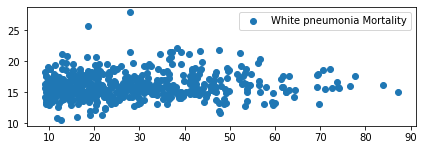

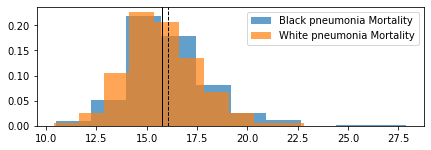

In [55]:
plt.subplot(2, 1, 1)
plt.scatter(black_pn_df['Percent One Race Black+'], black_pn_df['Mortality Percentage'], label="White pneumonia Mortality")
plt.legend()
plt.tight_layout()

plt.show()
plt.subplot(2, 1, 2)
plt.hist(black_pn_df['Mortality Percentage'], 10, density=True, alpha=0.7, label="Black pneumonia Mortality")
plt.hist(white_pn_df['Mortality Percentage'], 10, density=True, alpha=0.7, label="White pneumonia Mortality")
plt.axvline(mean(black_pn_df['Mortality Percentage']), color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean(white_pn_df['Mortality Percentage']), color='k', linestyle='solid', linewidth=1)
plt.legend()  
plt.tight_layout()
plt.show()

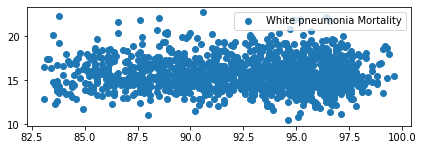

In [56]:
plt.subplot(2, 1, 1)
plt.scatter(white_pn_df['Percent One Race White'], white_pn_df['Mortality Percentage'], label="White pneumonia Mortality")
plt.legend()
plt.tight_layout()

In [57]:
white_ha_df = white_df[white_df['Measure Name'] == 'Death rate for heart attack patients']
white_ha_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
9,ADA,ID,Death rate for heart attack patients,12.400000,90.5,1.4
14,ADAIR,MO,Death rate for heart attack patients,12.900000,91.6,2.7
27,ADAMS,IL,Death rate for heart attack patients,12.300000,92.9,4.1
40,ADAMS,NE,Death rate for heart attack patients,12.500000,93.0,0.6
47,ADAMS,PA,Death rate for heart attack patients,12.900000,92.7,1.4
...,...,...,...,...,...,...
6930,YANKTON,SD,Death rate for heart attack patients,12.500000,92.4,1.6
6937,YAVAPAI,AZ,Death rate for heart attack patients,12.150000,91.3,0.7
6947,YELLOWSTONE,MT,Death rate for heart attack patients,13.100000,90.2,0.7
6956,YORK,ME,Death rate for heart attack patients,12.850000,95.5,0.9


In [58]:
black_ha_df = black_df[black_df['Measure Name'] == 'Death rate for heart attack patients']
black_ha_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
5,ACCOMACK,VA,Death rate for heart attack patients,12.900000,68.2,28.6
34,ADAMS,MS,Death rate for heart attack patients,13.300000,40.9,56.3
54,AIKEN,SC,Death rate for heart attack patients,14.900000,70.7,25.0
61,ALACHUA,FL,Death rate for heart attack patients,12.400000,68.9,20.1
65,ALAMANCE,NC,Death rate for heart attack patients,14.100000,69.8,19.5
...,...,...,...,...,...,...
6817,WINCHESTER CITY,VA,Death rate for heart attack patients,13.200000,82.0,10.1
6835,WINNEBAGO,IL,Death rate for heart attack patients,13.566667,78.8,13.0
6892,WORCESTER,MD,Death rate for heart attack patients,14.200000,83.0,12.9
6905,WYANDOTTE,KS,Death rate for heart attack patients,11.800000,58.8,22.3


In [59]:
st.ttest_ind(black_ha_df['Mortality Percentage'], white_ha_df['Mortality Percentage'], equal_var=False)

Ttest_indResult(statistic=1.7499458570056674, pvalue=0.08050344559882687)

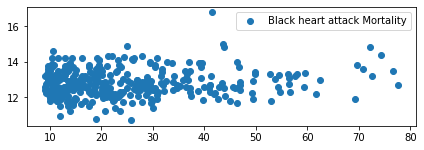

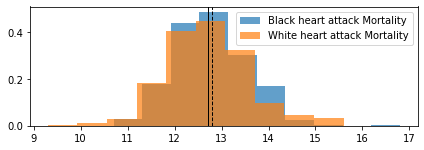

In [60]:
plt.subplot(2, 1, 1)
plt.scatter(black_ha_df['Percent One Race Black+'], black_ha_df['Mortality Percentage'], label="Black heart attack Mortality")
plt.legend()
plt.tight_layout()

plt.show()
plt.subplot(2, 1, 2)
plt.hist(black_ha_df['Mortality Percentage'], 10, density=True, alpha=0.7, label="Black heart attack Mortality")
plt.hist(white_ha_df['Mortality Percentage'], 10, density=True, alpha=0.7, label="White heart attack Mortality")
plt.axvline(mean(black_ha_df['Mortality Percentage']), color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean(white_ha_df['Mortality Percentage']), color='k', linestyle='solid', linewidth=1)
plt.legend()  
plt.tight_layout()
plt.show()

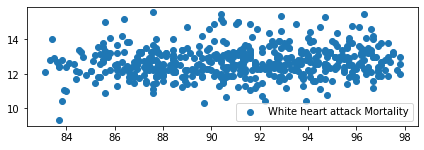

In [61]:
plt.subplot(2, 1, 1)
plt.scatter(white_ha_df['Percent One Race White'], white_ha_df['Mortality Percentage'], label="White heart attack Mortality")
plt.legend()
plt.tight_layout()

In [62]:
white_hf_df = white_df[white_df['Measure Name'] == 'Death rate for heart failure patients']
white_hf_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
10,ADA,ID,Death rate for heart failure patients,11.566667,90.5,1.4
15,ADAIR,MO,Death rate for heart failure patients,13.600000,91.6,2.7
28,ADAMS,IL,Death rate for heart failure patients,10.100000,92.9,4.1
31,ADAMS,IN,Death rate for heart failure patients,12.700000,96.4,1.1
37,ADAMS,ND,Death rate for heart failure patients,10.400000,94.0,2.1
...,...,...,...,...,...,...
6948,YELLOWSTONE,MT,Death rate for heart failure patients,12.200000,90.2,0.7
6957,YORK,ME,Death rate for heart failure patients,13.000000,95.5,0.9
6960,YORK,NE,Death rate for heart failure patients,12.000000,94.7,1.6
6964,YORK,PA,Death rate for heart failure patients,11.666667,88.4,5.9


In [63]:
black_hf_df = black_df[black_df['Measure Name'] == 'Death rate for heart failure patients']
black_hf_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
2,ACADIA,LA,Death rate for heart failure patients,11.800000,79.3,17.4
6,ACCOMACK,VA,Death rate for heart failure patients,11.400000,68.2,28.6
35,ADAMS,MS,Death rate for heart failure patients,10.800000,40.9,56.3
55,AIKEN,SC,Death rate for heart failure patients,10.200000,70.7,25.0
62,ALACHUA,FL,Death rate for heart failure patients,10.333333,68.9,20.1
...,...,...,...,...,...,...
6893,WORCESTER,MD,Death rate for heart failure patients,12.800000,83.0,12.9
6906,WYANDOTTE,KS,Death rate for heart failure patients,8.600000,58.8,22.3
6923,YALOBUSHA,MS,Death rate for heart failure patients,12.200000,59.0,39.7
6941,YAZOO,MS,Death rate for heart failure patients,11.100000,36.9,59.6


In [64]:
st.ttest_ind(black_hf_df['Mortality Percentage'], white_hf_df['Mortality Percentage'], equal_var=False)

Ttest_indResult(statistic=-8.020500438026618, pvalue=2.6328106862107735e-15)

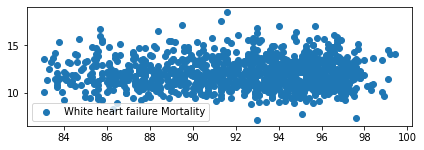

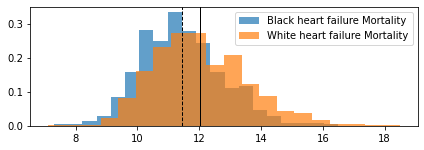

In [65]:
plt.subplot(2, 1, 1)
plt.scatter(white_hf_df['Percent One Race White'], white_hf_df['Mortality Percentage'], label="White heart failure Mortality")
plt.legend()
plt.tight_layout()

plt.show()
plt.subplot(2, 1, 2)
plt.hist(black_hf_df['Mortality Percentage'], 20, density=True, alpha=0.7, label="Black heart failure Mortality")
plt.hist(white_hf_df['Mortality Percentage'], 20, density=True, alpha=0.7, label="White heart failure Mortality")
plt.axvline(mean(black_hf_df['Mortality Percentage']), color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean(white_hf_df['Mortality Percentage']), color='k', linestyle='solid', linewidth=1)
plt.legend()  
plt.tight_layout()
plt.show()

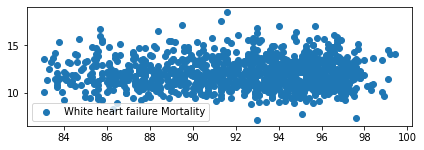

In [66]:
plt.subplot(2, 1, 1)
plt.scatter(white_hf_df['Percent One Race White'], white_hf_df['Mortality Percentage'], label="White heart failure Mortality")
plt.legend()
plt.tight_layout()

In [67]:
#race_dropped.to_csv(path_or_buf='../Data/race_by_pop', header=True)

In [68]:
black_hf_df

,County Name,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+
2,ACADIA,LA,Death rate for heart failure patients,11.800000,79.3,17.4
6,ACCOMACK,VA,Death rate for heart failure patients,11.400000,68.2,28.6
35,ADAMS,MS,Death rate for heart failure patients,10.800000,40.9,56.3
55,AIKEN,SC,Death rate for heart failure patients,10.200000,70.7,25.0
62,ALACHUA,FL,Death rate for heart failure patients,10.333333,68.9,20.1
...,...,...,...,...,...,...
6893,WORCESTER,MD,Death rate for heart failure patients,12.800000,83.0,12.9
6906,WYANDOTTE,KS,Death rate for heart failure patients,8.600000,58.8,22.3
6923,YALOBUSHA,MS,Death rate for heart failure patients,12.200000,59.0,39.7
6941,YAZOO,MS,Death rate for heart failure patients,11.100000,36.9,59.6
